In [1]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch    # Plotting dendogram
from sklearn.cluster import AgglomerativeClustering    # to do segmentation
from sklearn.preprocessing import StandardScaler , normalize
from sklearn.preprocessing import  MinMaxScaler
import numpy as np
import pandas as pd
import re
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
df=pd.read_excel("D:\Work\Data Science and Analyst Course\ExcelR\Data Science\Project_Clustering/World_development_mesurement.xlsx")
df

Birth Rate Business Tax Rate  CO2 Emissions                   Country  \
0          0.020               NaN        87931.0                   Algeria   
1          0.050               NaN         9542.0                    Angola   
2          0.043               NaN         1617.0                     Benin   
3          0.027               NaN         4276.0                  Botswana   
4          0.046               NaN         1041.0              Burkina Faso   
...          ...               ...            ...                       ...   
2699         NaN               NaN            NaN  Turks and Caicos Islands   
2700       0.013             46.4%            NaN             United States   
2701       0.015             41.9%            NaN                   Uruguay   
2702       0.020             61.9%            NaN             Venezuela, RB   
2703       0.011               NaN            NaN     Virgin Islands (U.S.)   

      Days to Start Business  Ease of Business  Energy Usage  \
0                        NaN               NaN       26998.0   
1                        NaN               NaN        7499.0   
2                        NaN               NaN        1983.0   
3                        NaN               NaN        1836.0   
4                        NaN               NaN           NaN   
...                      ...               ...           ...   
2699                     NaN               NaN           NaN   
2700                     5.0               4.0     2132446.0   
2701                     7.0              85.0           NaN   
2702                   144.0             180.0           NaN   
2703                     NaN               NaN           NaN   

                      GDP  Health Exp % GDP Health Exp/Capita  ...  \
0         $54,790,058,957             0.035               $60  ...   
1          $9,129,594,819             0.034               $22  ...   
2          $2,359,122,303             0.043               $15  ...   
3          $5,788,311,645             0.047              $152  ...   
4          $2,610,959,139             0.051               $12  ...   
...                   ...               ...               ...  ...   
2699                  NaN               NaN               NaN  ...   
2700  $16,244,600,000,000             0.179            $8,895  ...   
2701      $50,004,354,667             0.089            $1,308  ...   
2702     $381,286,223,859             0.046              $593  ...   
2703                  NaN               NaN               NaN  ...   

      Life Expectancy Male  Mobile Phone Usage  Number of Records  \
0                     67.0                 0.0                  1   
1                     44.0                 0.0                  1   
2                     53.0                 0.0                  1   
3                     49.0                 0.1                  1   
4                     49.0                 0.0                  1   
...                    ...                 ...                ...   
2699                   NaN                 NaN                  1   
2700                  76.0                 1.0                  1   
2701                  74.0                 1.5                  1   
2702                  72.0                 1.0                  1   
2703                  76.0                 NaN                  1   

      Population 0-14  Population 15-64  Population 65+  Population Total  \
0               0.342             0.619           0.039          31719449   
1               0.476             0.499           0.025          13924930   
2               0.454             0.517           0.029           6949366   
3               0.383             0.587           0.029           1755375   
4               0.468             0.505           0.028          11607944   
...               ...               ...             ...               ...   
2699              NaN               NaN             NaN             32427   
27

In [3]:
### Removing special characters
col=['Tourism Outbound','Tourism Inbound','Business Tax Rate','Health Exp/Capita',"GDP"]  
for i in col:
    df[i] = df[i].apply(lambda x: re.sub("[$,%]","",x) if isinstance(x, str) and x is not None else x)
    df[i] = pd.to_numeric(df[i],errors='coerce')
df

Birth Rate  Business Tax Rate  CO2 Emissions                   Country  \
0          0.020                NaN        87931.0                   Algeria   
1          0.050                NaN         9542.0                    Angola   
2          0.043                NaN         1617.0                     Benin   
3          0.027                NaN         4276.0                  Botswana   
4          0.046                NaN         1041.0              Burkina Faso   
...          ...                ...            ...                       ...   
2699         NaN                NaN            NaN  Turks and Caicos Islands   
2700       0.013               46.4            NaN             United States   
2701       0.015               41.9            NaN                   Uruguay   
2702       0.020               61.9            NaN             Venezuela, RB   
2703       0.011                NaN            NaN     Virgin Islands (U.S.)   

      Days to Start Business  Ease of Business  Energy Usage           GDP  \
0                        NaN               NaN       26998.0  5.479006e+10   
1                        NaN               NaN        7499.0  9.129595e+09   
2                        NaN               NaN        1983.0  2.359122e+09   
3                        NaN               NaN        1836.0  5.788312e+09   
4                        NaN               NaN           NaN  2.610959e+09   
...                      ...               ...           ...           ...   
2699                     NaN               NaN           NaN           NaN   
2700                     5.0               4.0     2132446.0  1.624460e+13   
2701                     7.0              85.0           NaN  5.000435e+10   
2702                   144.0             180.0           NaN  3.812862e+11   
2703                     NaN               NaN           NaN           NaN   

      Health Exp % GDP  Health Exp/Capita  ...  Life Expectancy Male  \
0                0.035               60.0  ...                  67.0   
1                0.034               22.0  ...                  44.0   
2                0.043               15.0  ...                  53.0   
3                0.047              152.0  ...                  49.0   
4                0.051               12.0  ...                  49.0   
...                ...                ...  ...                   ...   
2699               NaN                NaN  ...                   NaN   
2700             0.179             8895.0  ...                  76.0   
2701             0.089             1308.0  ...                  74.0   
2702             0.046              593.0  ...                  72.0   
2703               NaN                NaN  ...                  76.0   

      Mobile Phone Usage  Number of Records  Population 0-14  \
0                    0.0                  1            0.342   
1                    0.0                  1            0.476   
2                    0.0                  1            0.454   
3                    0.1                  1            0.383   
4                    0.0                  1            0.468   
...                  ...                ...              ...   
2699                 NaN                  1              NaN   
2700                 1.0                  1            0.196   
2701                 1.5                  1            0.220   
2702                 1.0                  1            0.288   
2703                 NaN                  1            0.206   

      Population 15-64  Population 65+  Population Total  Population Urban  \
0                0.619           0.039          31719449             0.599   
1                0.499           0.025          13924930             0.324   
2                0.517           0.029           6949366             0.383   
3                0.587           0.029           1755375             0.532   
4                0.505           0.028          11607944             0.178   
...   

In [4]:
print(df.shape)

(2704, 25)


In [5]:
df.columns

Index(['Birth Rate', 'Business Tax Rate', 'CO2 Emissions', 'Country',
       'Days to Start Business', 'Ease of Business', 'Energy Usage', 'GDP',
       'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax',
       'Infant Mortality Rate', 'Internet Usage', 'Lending Interest',
       'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage',
       'Number of Records', 'Population 0-14', 'Population 15-64',
       'Population 65+', 'Population Total', 'Population Urban',
       'Tourism Inbound', 'Tourism Outbound'],
      dtype='object')

In [6]:
### Let's rename columns name

df.rename({'Birth Rate':'Birth_rate', 'Business Tax Rate':'BTR', 'CO2 Emissions':'CO2_emiss',
       'Days to Start Business':'start_day', 'Ease of Business':'ease_business', 'Energy Usage':'EU',
       'Health Exp % GDP':'GDP_health', 'Health Exp/Capita':'Health_exp_capita', 'Hours to do Tax':'hours_todo_tax',
       'Infant Mortality Rate':'IMR', 'Internet Usage':'IU', 'Lending Interest':'leading_interest',
       'Life Expectancy Female':'LE_female', 'Life Expectancy Male':'LE_male', 'Mobile Phone Usage':'Mobile_usage',
       'Number of Records':'No_record', 'Population 0-14':'Popubelow14', 'Population 15-64':'Popubet15to64',
       'Population 65+':'Popu_65plus', 'Population Total':'Popu_total', 'Population Urban':'Popu_urban',
       'Tourism Inbound':'Tourism_inbound', 'Tourism Outbound':'Tourism_outbound'},axis=1,inplace=True)
df.columns

Index(['Birth_rate', 'BTR', 'CO2_emiss', 'Country', 'start_day',
       'ease_business', 'EU', 'GDP', 'GDP_health', 'Health_exp_capita',
       'hours_todo_tax', 'IMR', 'IU', 'leading_interest', 'LE_female',
       'LE_male', 'Mobile_usage', 'No_record', 'Popubelow14', 'Popubet15to64',
       'Popu_65plus', 'Popu_total', 'Popu_urban', 'Tourism_inbound',
       'Tourism_outbound'],
      dtype='object')

### Data Exploration

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Birth_rate         2585 non-null   float64
 1   BTR                1423 non-null   float64
 2   CO2_emiss          2125 non-null   float64
 3   Country            2704 non-null   object 
 4   start_day          1718 non-null   float64
 5   ease_business      185 non-null    float64
 6   EU                 1785 non-null   float64
 7   GDP                2494 non-null   float64
 8   GDP_health         2395 non-null   float64
 9   Health_exp_capita  2395 non-null   float64
 10  hours_todo_tax     1416 non-null   float64
 11  IMR                2444 non-null   float64
 12  IU                 2531 non-null   float64
 13  leading_interest   1880 non-null   float64
 14  LE_female          2568 non-null   float64
 15  LE_male            2568 non-null   float64
 16  Mobile_usage       2537 

In [8]:
df.describe()

Birth_rate          BTR     CO2_emiss    start_day  ease_business  \
count  2585.000000  1423.000000  2.125000e+03  1718.000000     185.000000   
mean      0.022715    48.966901  1.423071e+05    39.999418      94.875676   
std       0.011338    40.954116  6.159288e+05    57.318588      54.791906   
min       0.007000     8.200000  7.000000e+00     1.000000       1.000000   
25%       0.013000    32.400000  1.360000e+03    13.000000      48.000000   
50%       0.020000    41.000000  8.529000e+03    26.000000      94.000000   
75%       0.031000    51.550000  5.910800e+04    45.000000     142.000000   
max       0.053000   339.100000  8.286892e+06   694.000000     189.000000   

                 EU           GDP   GDP_health  Health_exp_capita  \
count  1.785000e+03  2.494000e+03  2395.000000        2395.000000   
mean   7.723684e+04  2.638540e+11     0.064170         801.397077   
std    2.599239e+05  1.129910e+12     0.026325        1473.448036   
min    8.000000e+00  6.310127e+07     0.008000           2.000000   
25%    3.737000e+03  3.539042e+09     0.046000          50.000000   
50%    1.433800e+04  1.507975e+10     0.061000         193.000000   
75%    4.185200e+04  1.102047e+11     0.079000         665.000000   
max    2.727728e+06  1.624460e+13     0.225000        9908.000000   

       hours_todo_tax  ...      LE_male  Mobile_usage  No_record  Popubelow14  \
count     1416.000000  ...  2568.000000   2537.000000     2704.0  2484.000000   
mean       302.068503  ...    66.461838      0.578124        1.0     0.303051   
std        273.299686  ...     9.390217      0.474647        0.0     0.106577   
min         12.000000  ...    37.000000      0.000000        1.0     0.118000   
25%        156.000000  ...    61.000000      0.100000        1.0     0.204750   
50%        239.000000  ...    69.000000      0.500000        1.0     0.299500   
75%        344.750000  ...    73.250000      0.900000        1.0     0.402000   
max       2600.000000  ...    88.000000      2.900000        1.0     0.500000   

       Popubet15to64  Popu_65plus    Popu_total   Popu_urban  Tourism_inbound  \
count    2484.000000  2484.000000  2.704000e+03  2678.000000     2.336000e+03   
mean        0.623481     0.073465  3.145729e+07     0.562953     4.939320e+09   
std         0.069660     0.049541  1.242894e+08     0.245897     1.385098e+10   
min         0.474000     0.003000  1.887600e+04     0.082000     7.000000e+05   
25%         0.559000     0.033000  8.783360e+05     0.356000     1.250000e+08   
50%         0.642500     0.052000  5.800324e+06     0.560000     6.885000e+08   
75%         0.676000     0.112000  2.014089e+07     0.765000     3.601500e+09   
max         0.858000     0.244000  1.350695e+09     1.000000     2.000920e+11   

       Tourism_outbound  
count      2.233000e+03  
mean       4.729435e+09  
std        1.326774e+10  
min        2.000000e+05  
25%        1.100000e+08  
50%        4.560000e+08  
75%        2.842000e+09  
max        1.265730e+11  

[8 rows x 24 columns]

### Checking for missing values

In [9]:
# As a part of the Data cleansing we check the data for any missing/ na values
# null count for columns

null_count_col = df.isnull().sum().value_counts

# null percentage for columns

null_percent_col = (df.isnull().sum() * 100 / len(df)).value_counts

print("Null Count for Columns:\n\n", null_count_col, "\n")
print("Null Percentage for Columns:\n\n", null_percent_col)

Null Count for Columns:

 <bound method IndexOpsMixin.value_counts of Birth_rate            119
BTR                  1281
CO2_emiss             579
Country                 0
start_day             986
ease_business        2519
EU                    919
GDP                   210
GDP_health            309
Health_exp_capita     309
hours_todo_tax       1288
IMR                   260
IU                    173
leading_interest      824
LE_female             136
LE_male               136
Mobile_usage          167
No_record               0
Popubelow14           220
Popubet15to64         220
Popu_65plus           220
Popu_total              0
Popu_urban             26
Tourism_inbound       368
Tourism_outbound      471
dtype: int64> 

Null Percentage for Columns:

 <bound method IndexOpsMixin.value_counts of Birth_rate            4.400888
BTR                  47.374260
CO2_emiss            21.412722
Country               0.000000
start_day            36.464497
ease_business        93.158284
EU 

In [10]:
# Let's remove Ease of Business due to 93% values are missing 
# Number of Records column have single value 1, that is not helping in clustering 
# Also, this is unsupervised model, let's drop country category column also.
df=df.drop(["ease_business",'No_record','Country'],axis=1)
df.columns

Index(['Birth_rate', 'BTR', 'CO2_emiss', 'start_day', 'EU', 'GDP',
       'GDP_health', 'Health_exp_capita', 'hours_todo_tax', 'IMR', 'IU',
       'leading_interest', 'LE_female', 'LE_male', 'Mobile_usage',
       'Popubelow14', 'Popubet15to64', 'Popu_65plus', 'Popu_total',
       'Popu_urban', 'Tourism_inbound', 'Tourism_outbound'],
      dtype='object')

In [11]:
# null count for rows

null_count_row = df.isnull().sum(axis=1).value_counts

# null percentage for rows

null_percent_row = (df.isnull().sum(axis=1) * 100 / len(df)).value_counts

print("Null Count for Rows:\n\n", null_count_row, "\n")
print("Null Percentage for Rows:\n\n", null_percent_row)

Null Count for Rows:

 <bound method IndexOpsMixin.value_counts of 0        3
1        3
2        4
3        3
4        5
        ..
2699    20
2700     1
2701     2
2702     2
2703    13
Length: 2704, dtype: int64> 

Null Percentage for Rows:

 <bound method IndexOpsMixin.value_counts of 0       0.110947
1       0.110947
2       0.147929
3       0.110947
4       0.184911
          ...   
2699    0.739645
2700    0.036982
2701    0.073964
2702    0.073964
2703    0.480769
Length: 2704, dtype: float64>


<AxesSubplot:xlabel='missing_vlue', ylabel='Density'>

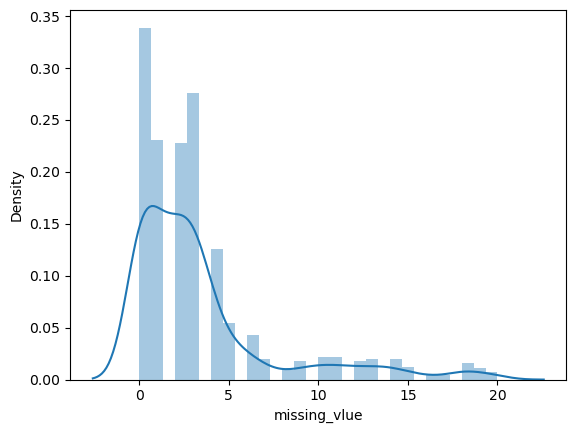

In [12]:
df["missing_vlue"] = df.isnull().sum(axis=1)
sns.distplot(df["missing_vlue"],bins=30)

<AxesSubplot:>

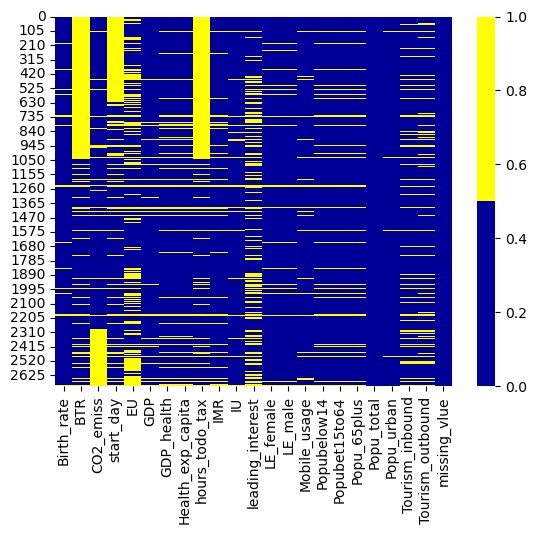

In [13]:
### Missing value Plot
cols = df.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(),
            cmap=sns.color_palette(colours))

In [14]:
### Let's drop rows who have missing values more than 80% 
### AFter removing two features, 22 features remain, 80% of 20 is 17.6 nearly equal to 18
# Here i count the total row having missing value more than 75%
count=0
for i in df["missing_vlue"] :
  if i>=18:
    count=count+1
  else:
    continue
print(count)




61


In [15]:
# removing the row df["missing_vlue"]>=18
remove=df["missing_vlue"]>=18
df=df[~remove]
df.shape

(2643, 23)

In [16]:
df1=df.drop(['missing_vlue'],axis=1)
df1.shape

(2643, 22)

In [17]:
### Now let's use KNN Imputer to handle missing value.

In [18]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=int(np.sqrt(2643) / 2))
df1 = pd.DataFrame(imputer.fit_transform(df1), columns=df1.columns)

In [19]:
df1

Birth_rate     BTR  CO2_emiss  start_day          EU           GDP  \
0          0.020  48.740   87931.00      33.88    26998.00  5.479006e+10   
1          0.050  42.044    9542.00      51.28     7499.00  9.129595e+09   
2          0.043  81.548    1617.00      37.96     1983.00  2.359122e+09   
3          0.027  43.536    4276.00      53.84     1836.00  5.788312e+09   
4          0.046  72.704    1041.00      66.92    18198.48  2.610959e+09   
...          ...     ...        ...        ...         ...           ...   
2638       0.015  29.100    1578.08      41.00    19423.56  2.343634e+10   
2639       0.013  46.400   38033.00       5.00  2132446.00  1.624460e+13   
2640       0.015  41.900   25487.28       7.00    23966.64  5.000435e+10   
2641       0.020  61.900   38033.00     144.00    18074.52  3.812862e+11   
2642       0.011  44.460     170.72      18.24       95.40  4.448988e+08   

      GDP_health  Health_exp_capita  hours_todo_tax      IMR  ...  LE_female  \
0        0.03500              60.00          350.04  0.03400  ...       71.0   
1        0.03400              22.00          329.64  0.12800  ...       47.0   
2        0.04300              15.00          297.00  0.09000  ...       57.0   
3        0.04700             152.00          247.80  0.05400  ...       52.0   
4        0.05100              12.00          276.36  0.09600  ...       52.0   
...          ...                ...             ...      ...  ...        ...   
2638     0.05400             972.00          210.00  0.02000  ...       74.0   
2639     0.17900            8895.00          175.00  0.00600  ...       81.0   
2640     0.08900            1308.00          310.00  0.01000  ...       80.0   
2641     0.04600             593.00          792.00  0.01300  ...       78.0   
2642     0.08648             325.72          137.76  0.02452  ...       83.0   

      LE_male  Mobile_usage  Popubelow14  Popubet15to64  Popu_65plus  \
0        67.0         0.000        0.342          0.619        0.039   
1        44.0         0.000        0.476          0.499        0.025   
2        53.0         0.000        0.454          0.517        0.029   
3        49.0         0.100        0.383          0.587        0.029   
4        49.0         0.000        0.468          0.505        0.028   
...       ...           ...          ...            ...          ...   
2638     66.0         1.400        0.207          0.705        0.088   
2639     76.0         1.000        0.196          0.667        0.136   
2640     74.0         1.500        0.220          0.639        0.140   
2641     72.0         1.000        0.288          0.652        0.060   
2642     76.0         0.488        0.206          0.641        0.152   

       Popu_total  Popu_urban  Tourism_inbound  Tourism_outbound  
0      31719449.0       0.599     1.020000e+08      1.930000e+08  
1      13924930.0       0.324     3.400000e+07      1.460000e+08  
2       6949366.0       0.383     7.700000e+07      5.000000e+07  
3       1755375.0       0.532     2.270000e+08      2.090000e+08  
4      11607944.0       0.178     2.300000e+07      3.000000e+07  
...           ...         ...              ...               ...  
2638    1337439.0       0.088     4.837200e+08      2.079600e+08  
2639  313873685.0       0.811     2.000920e+11      1.265730e+11  
2640    3395253.0       0.948     2.222000e+09      1.028000e+09  
2641   29954782.0       0.889     9.040000e+08      3.202000e+09  
2642     105275.0       0.949     2.341920e+08      9.928000e+06  

[2643 rows x 22 columns]

In [20]:
df1.describe()

Birth_rate          BTR     CO2_emiss   start_day            EU  \
count  2643.000000  2643.000000  2.643000e+03  2643.00000  2.643000e+03   
mean      0.022498    49.561382  1.187558e+05    41.49014  5.731830e+04   
std       0.011308    31.558027  5.543704e+05    47.24514  2.155534e+05   
min       0.007000     8.200000  7.000000e+00     1.00000  8.000000e+00   
25%       0.013000    37.800000  1.462480e+03    19.00000  5.526720e+03   
50%       0.020000    44.448000  1.184800e+04    33.60000  1.591700e+04   
75%       0.030000    51.726000  4.611554e+04    51.00000  2.581900e+04   
max       0.053000   339.100000  8.286892e+06   694.00000  2.727728e+06   

                GDP   GDP_health  Health_exp_capita  hours_todo_tax  \
count  2.643000e+03  2643.000000        2643.000000     2643.000000   
mean   2.511597e+11     0.063869         863.766856      293.336739   
std    1.098932e+12     0.025440        1441.514465      205.303304   
min    6.310127e+07     0.008000           2.000000       12.000000   
25%    3.139731e+09     0.047000          57.000000      199.000000   
50%    1.442561e+10     0.060000         238.000000      270.000000   
75%    1.024344e+11     0.077000        1004.000000      331.560000   
max    1.624460e+13     0.225000        9908.000000     2600.000000   

               IMR  ...    LE_female      LE_male  Mobile_usage  Popubelow14  \
count  2643.000000  ...  2643.000000  2643.000000   2643.000000  2643.000000   
mean      0.033717  ...    71.421551    66.709421      0.580289     0.301583   
std       0.029859  ...    10.673079     9.377208      0.466567     0.103923   
min       0.002000  ...    39.000000    37.000000      0.000000     0.118000   
25%       0.009000  ...    65.000000    61.000000      0.200000     0.208000   
50%       0.021000  ...    75.000000    69.000000      0.500000     0.297000   
75%       0.056420  ...    79.000000    74.000000      0.900000     0.397000   
max       0.141000  ...    87.000000    88.000000      2.900000     0.500000   

       Popubet15to64  Popu_65plus    Popu_total   Popu_urban  Tourism_inbound  \
count    2643.000000  2643.000000  2.643000e+03  2643.000000     2.643000e+03   
mean        0.624516     0.073897  3.218226e+07     0.558595     4.487236e+09   
std         0.067882     0.048290  1.256233e+08     0.243990     1.308992e+10   
min         0.474000     0.003000  2.696900e+04     0.082000     7.000000e+05   
25%         0.563500     0.034000  1.217485e+06     0.354000     1.695000e+08   
50%         0.643000     0.057000  6.130922e+06     0.559000     7.060000e+08   
75%         0.674000     0.107000  2.060985e+07     0.757500     2.995500e+09   
max         0.858000     0.244000  1.350695e+09     1.000000     2.000920e+11   

       Tourism_outbound  
count      2.643000e+03  
mean       4.079669e+09  
std        1.229642e+10  
min        2.000000e+05  
25%        1.180000e+08  
50%        3.350000e+08  
75%        2.030040e+09  
max        1.265730e+11  

[8 rows x 22 columns]

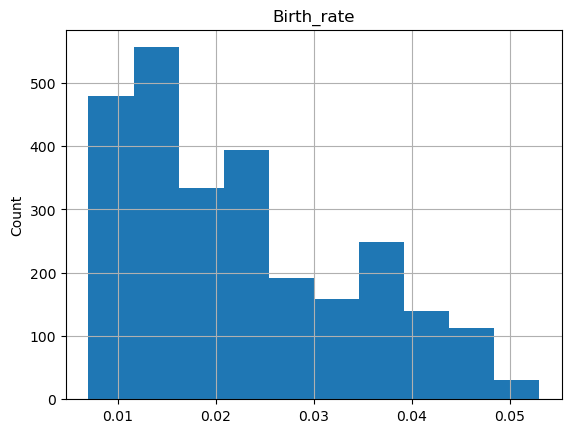

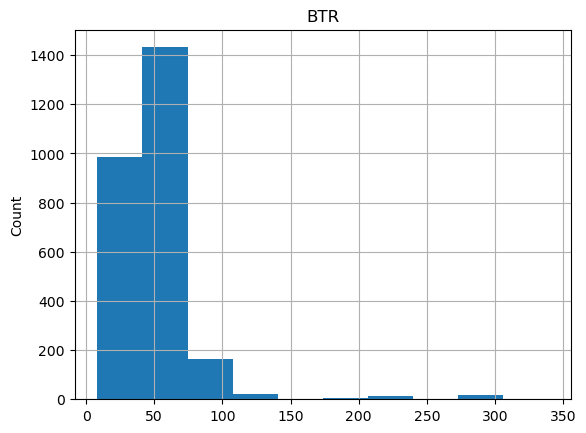

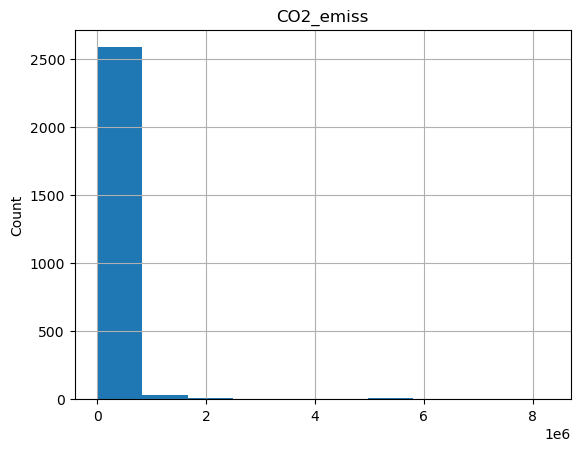

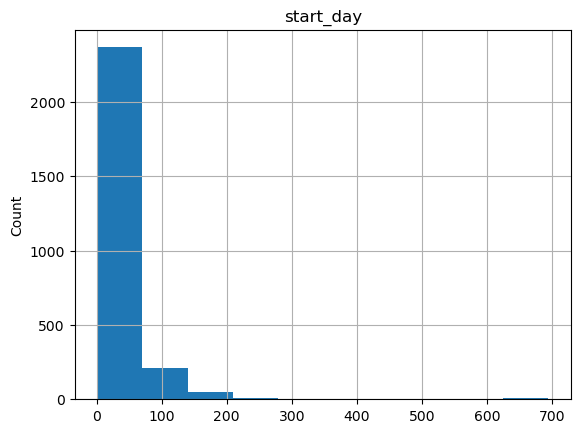

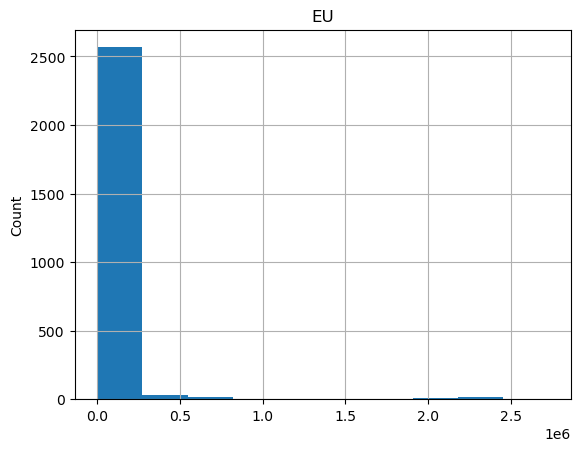

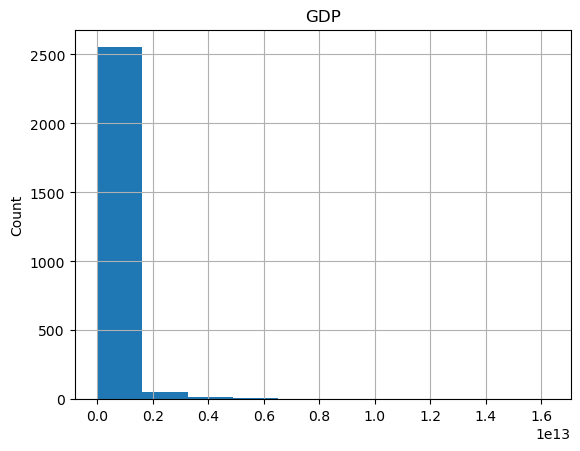

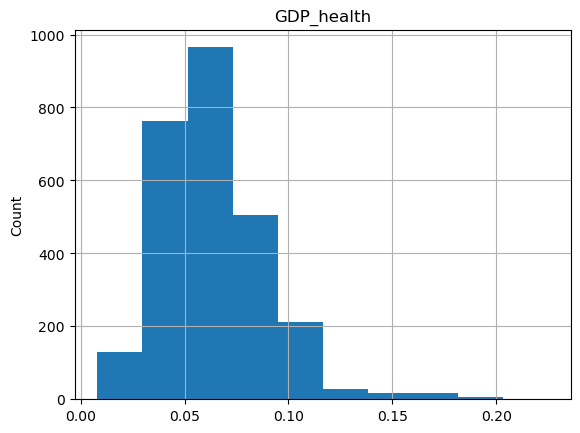

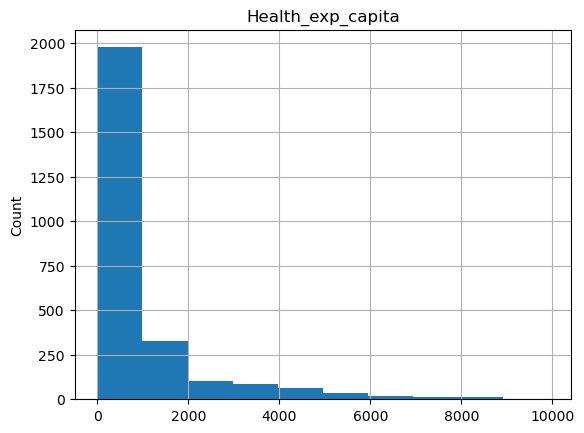

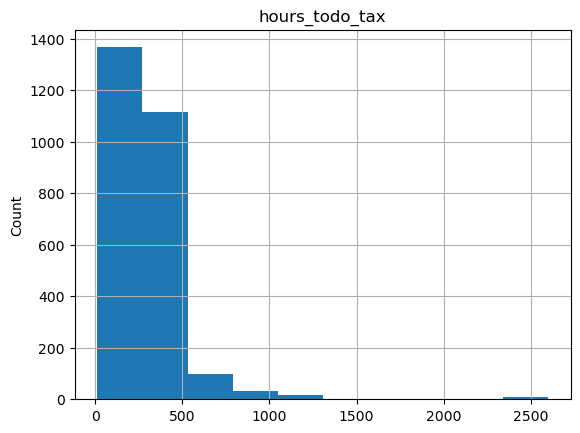

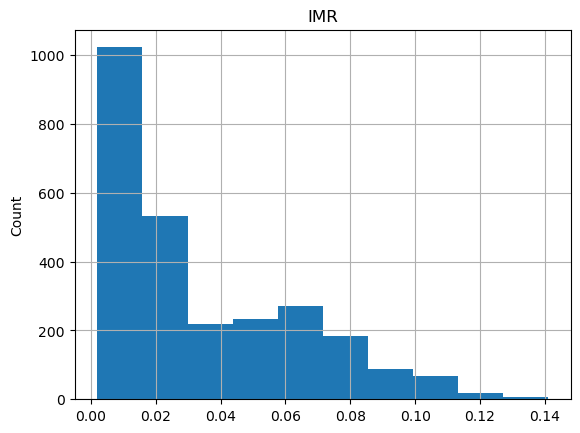

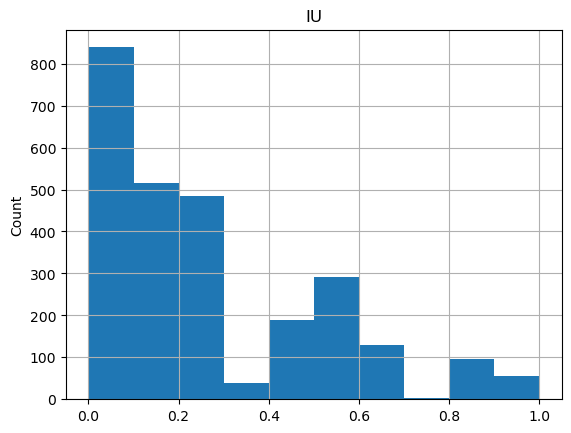

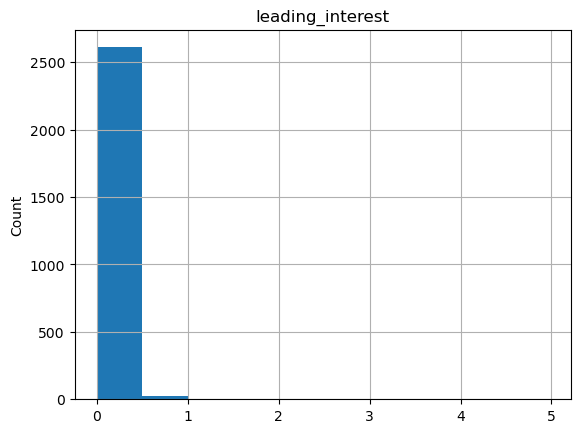

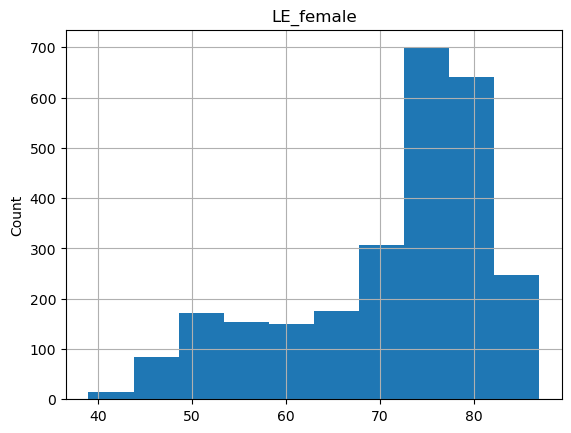

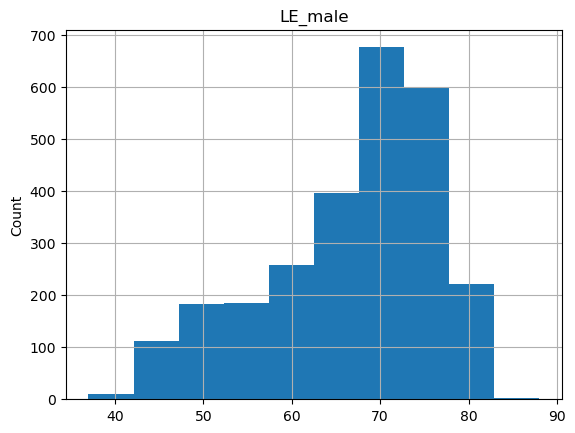

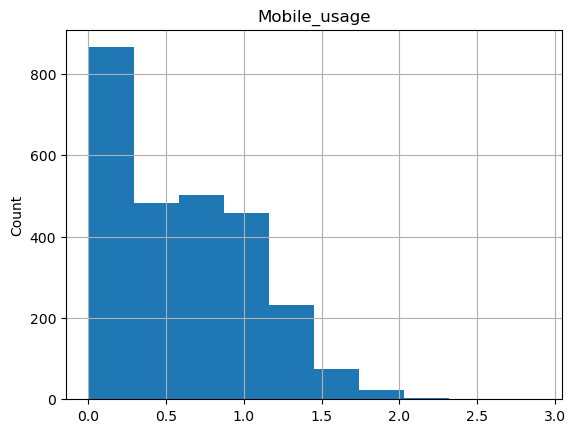

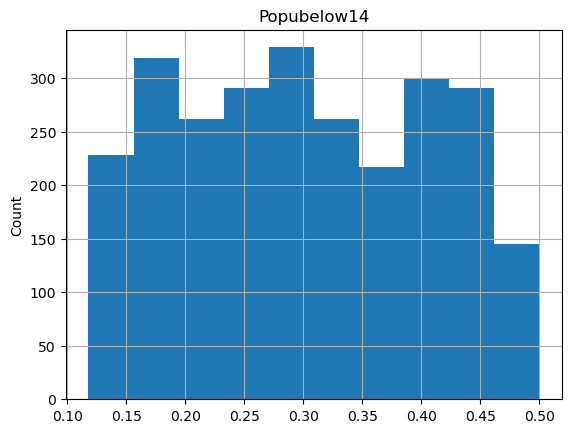

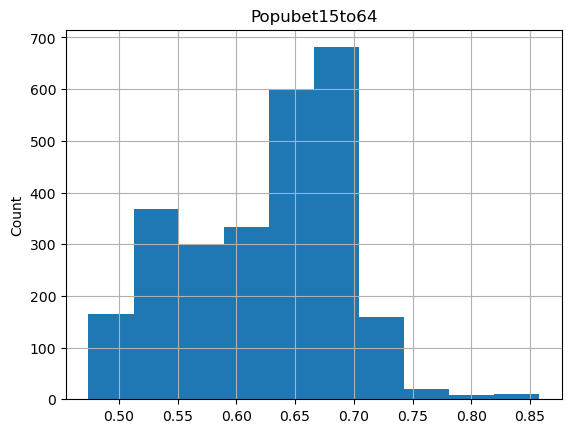

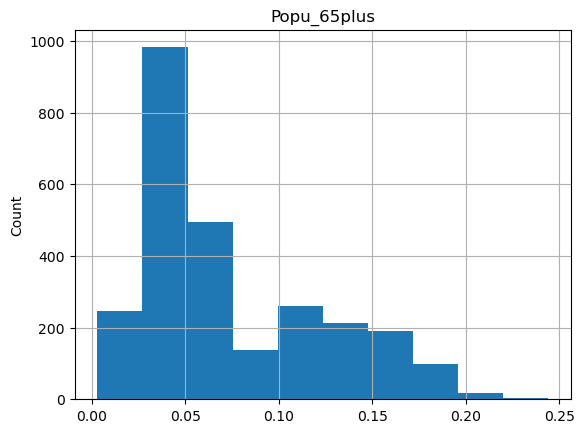

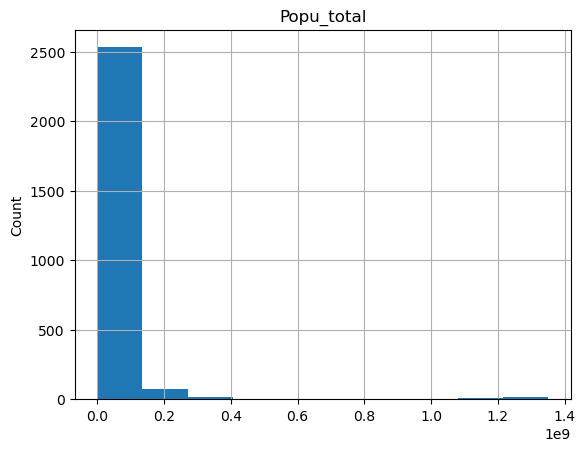

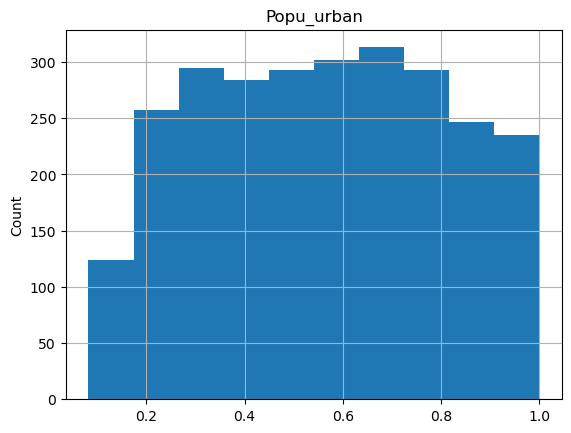

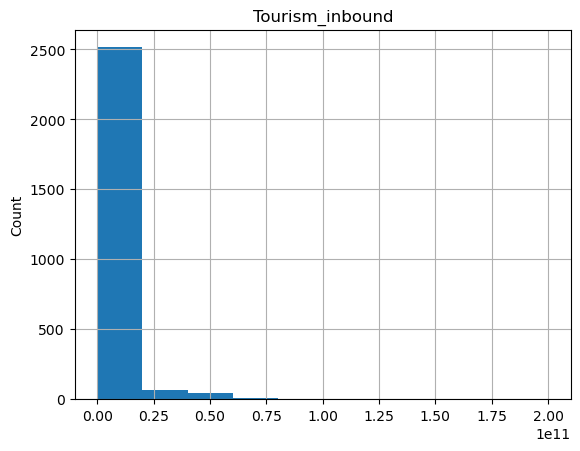

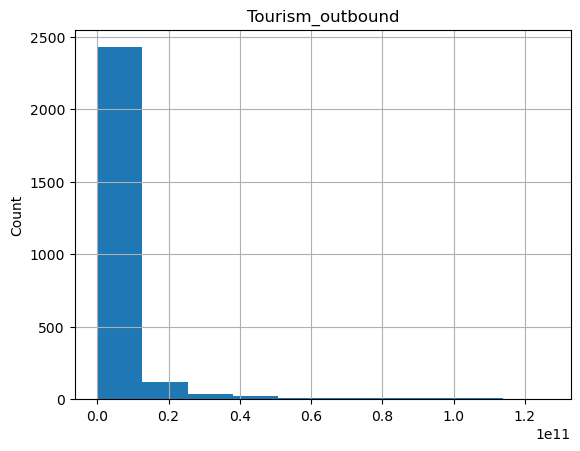

In [21]:
### Let's plot histogram to find distribution of features
for feature in df1.columns:
    df1=df1.copy()
    df1[feature].hist(bins=10)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

After observing histogram plots of all features, it is noted that most of data are either left or right skewed.

### Let's Check Outliers

In [22]:
df1.columns

Index(['Birth_rate', 'BTR', 'CO2_emiss', 'start_day', 'EU', 'GDP',
       'GDP_health', 'Health_exp_capita', 'hours_todo_tax', 'IMR', 'IU',
       'leading_interest', 'LE_female', 'LE_male', 'Mobile_usage',
       'Popubelow14', 'Popubet15to64', 'Popu_65plus', 'Popu_total',
       'Popu_urban', 'Tourism_inbound', 'Tourism_outbound'],
      dtype='object')

In [23]:
len(df1.columns)


22

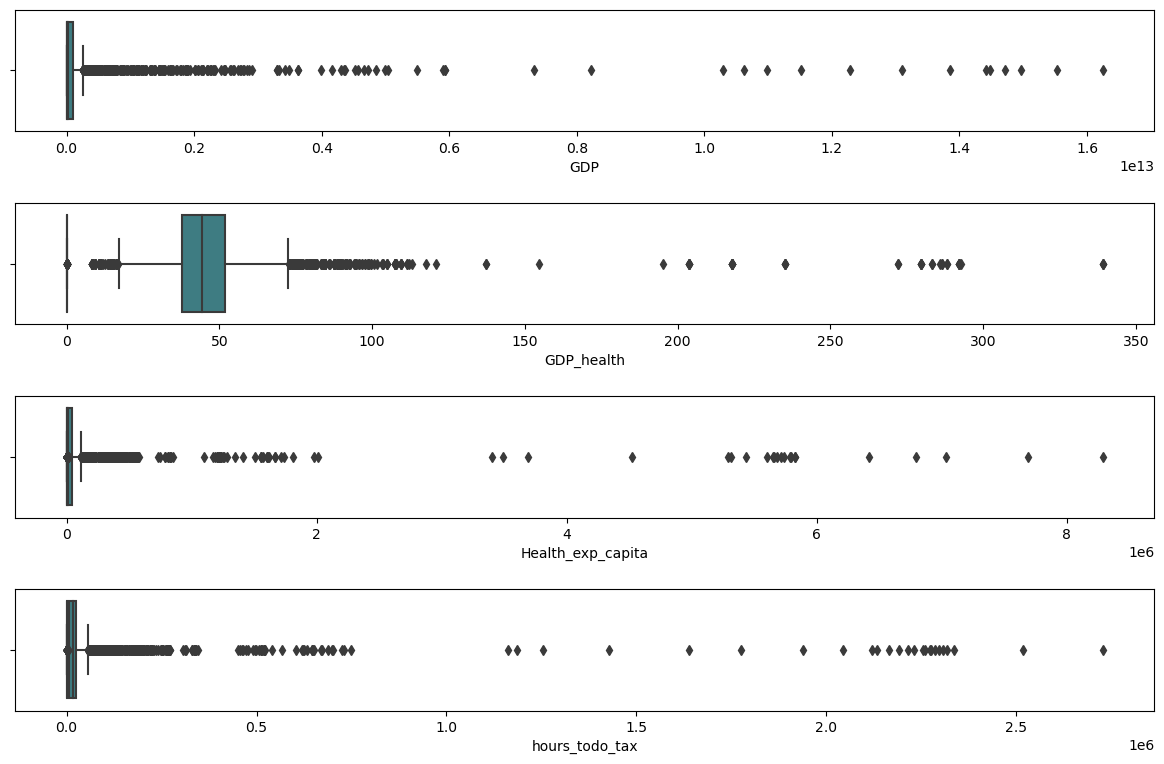

In [24]:
ot=df1.copy() 
fig, axes=plt.subplots(4,1,figsize=(12,8),sharex=False,sharey=False)
sns.boxplot(x='Birth_rate',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='BTR',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='CO2_emiss',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='EU',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='GDP',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='GDP_health',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='Health_exp_capita',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='hours_todo_tax',data=ot,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

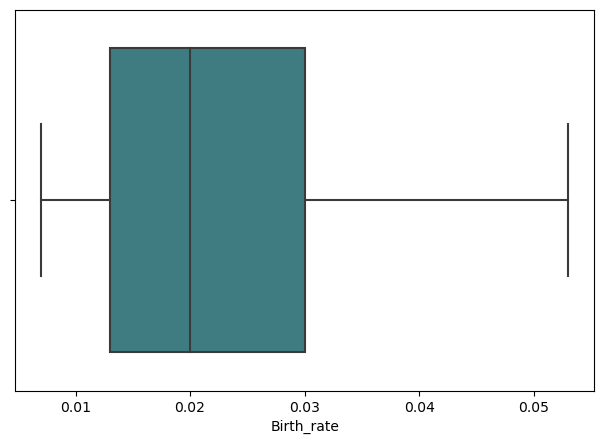

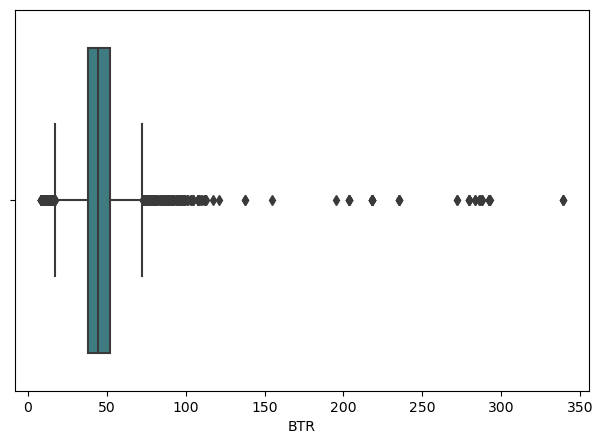

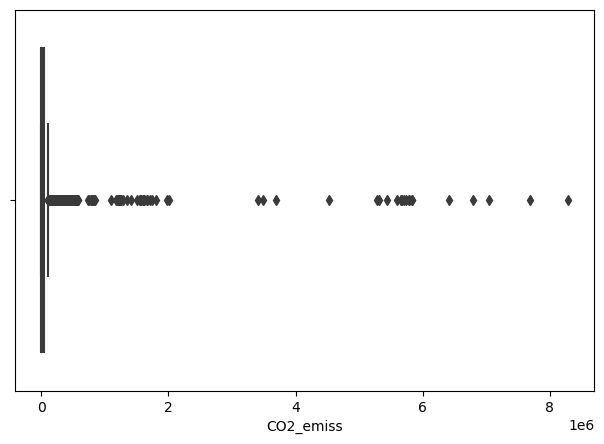

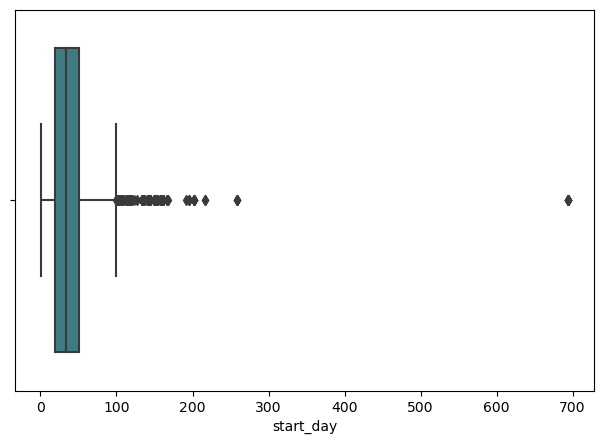

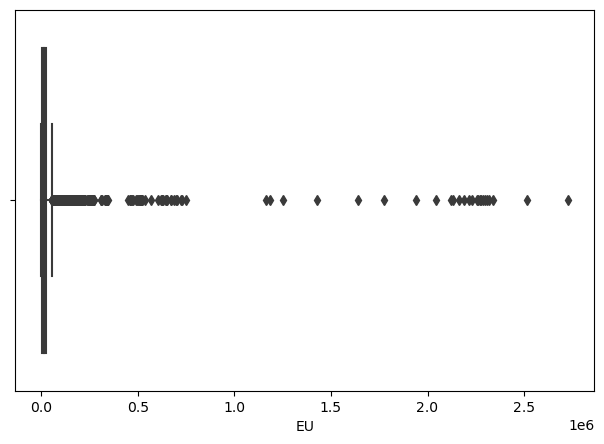

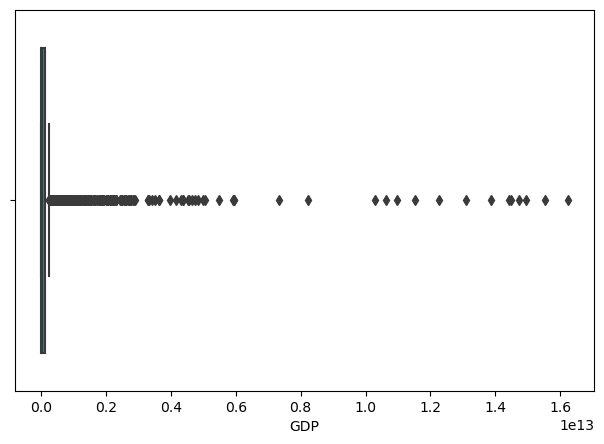

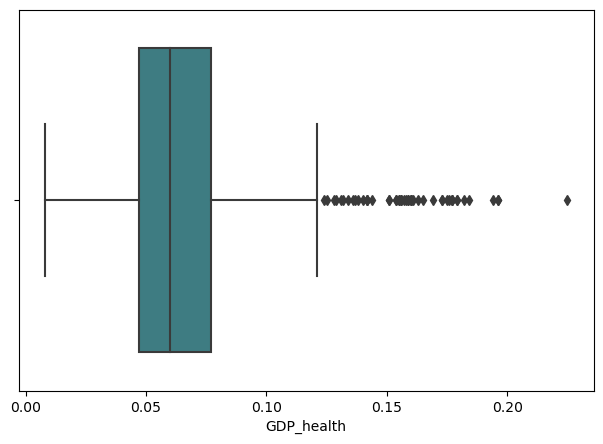

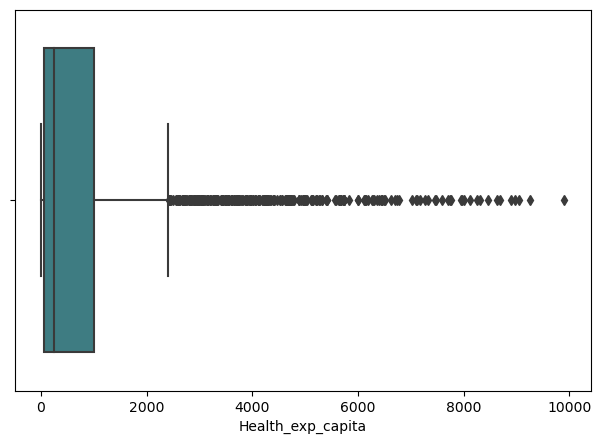

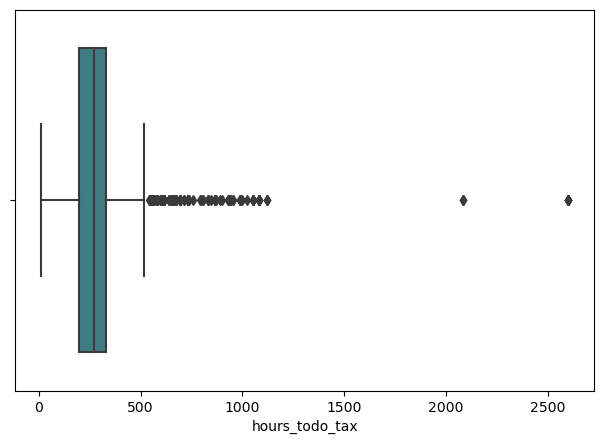

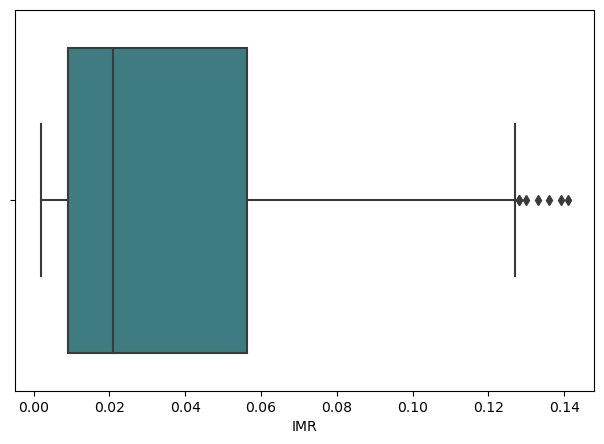

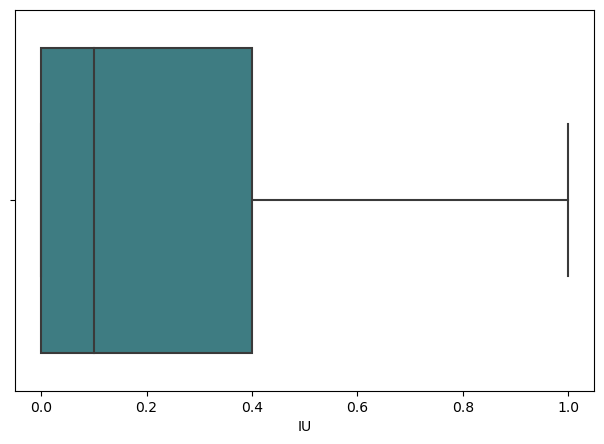

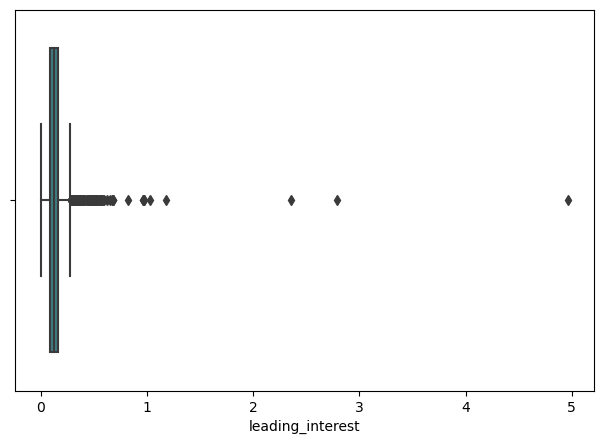

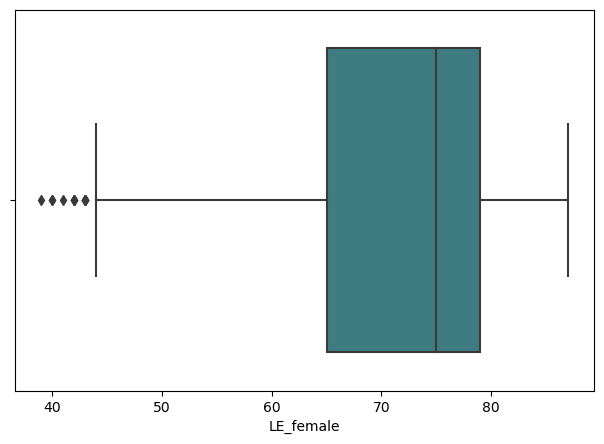

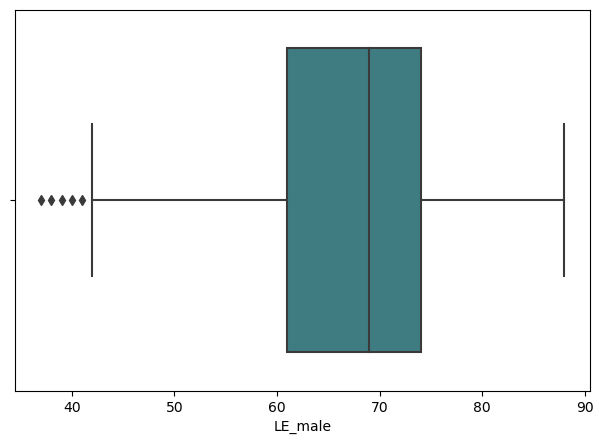

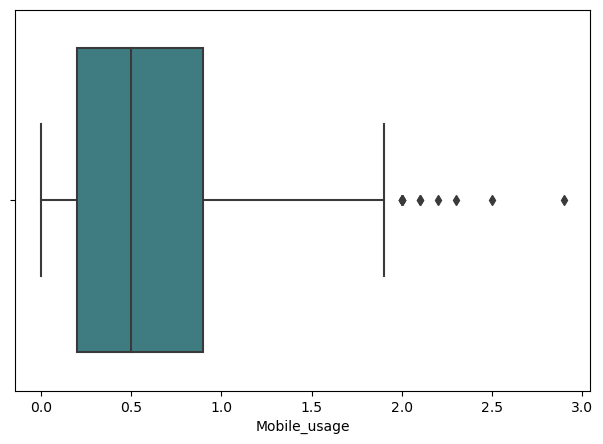

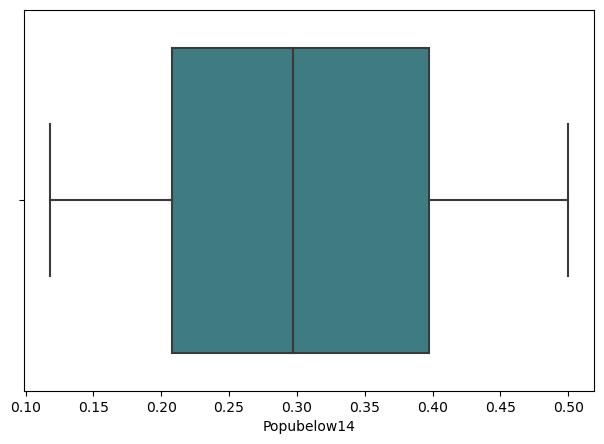

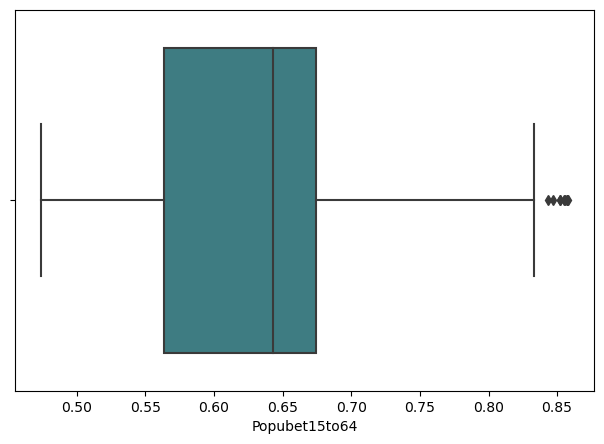

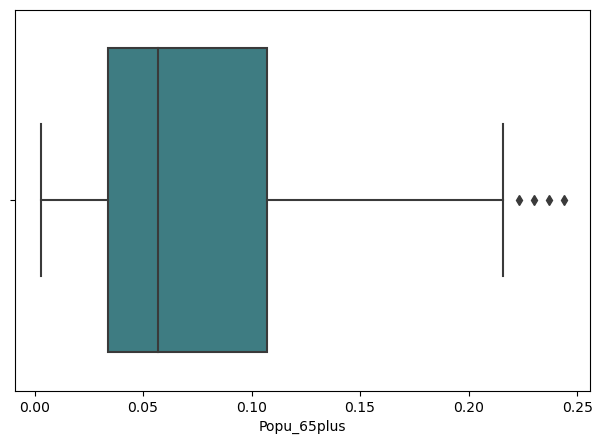

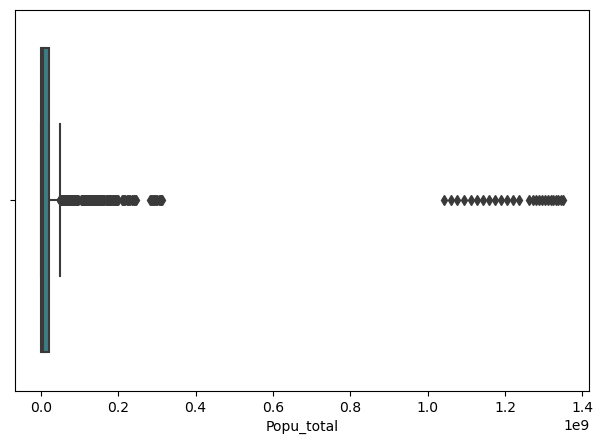

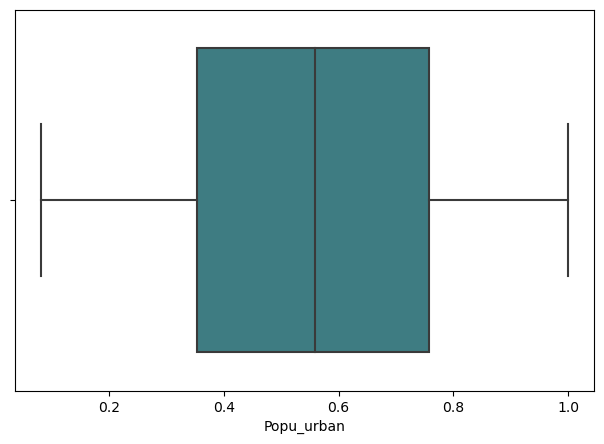

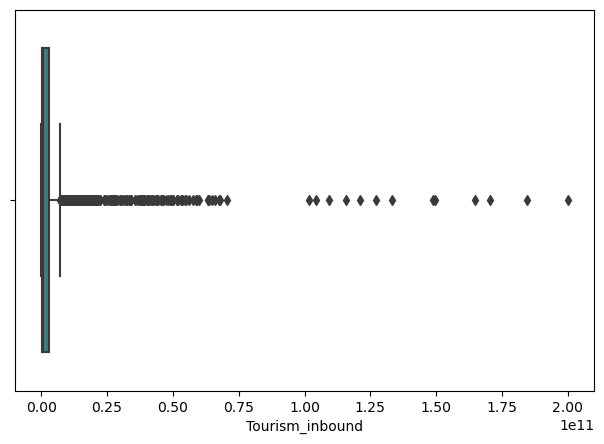

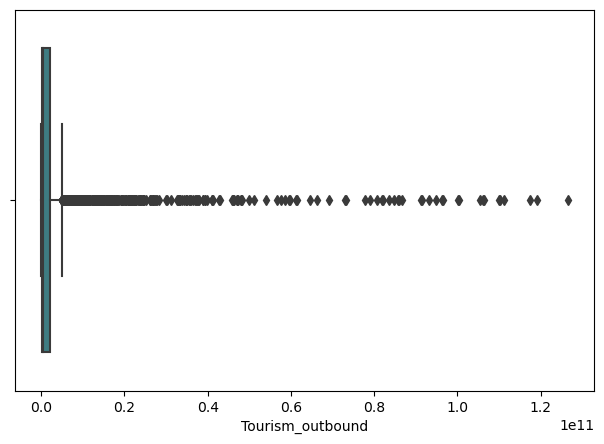

In [25]:
ot=df1.copy()
for feature in df1.columns:
    plt.figure()
    sns.boxplot(x=df1[feature],data=ot,palette='crest')
    plt.tight_layout(pad=2.0)

### Observations
Almost all features are having outlier expect features Population urban,Population of 0-14, Internet Usage, and birthrate

In [26]:
### Let's try transformation to check whether outliers are treated or not

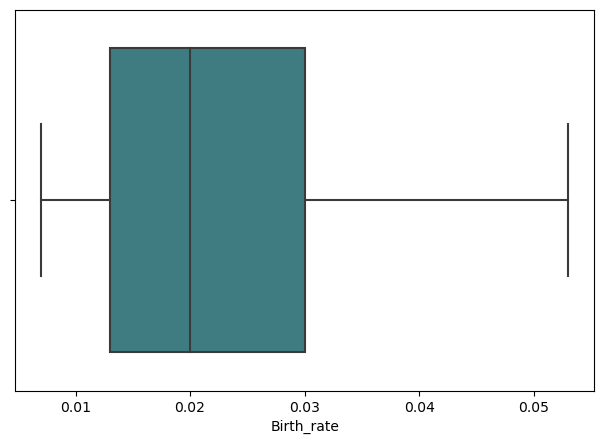

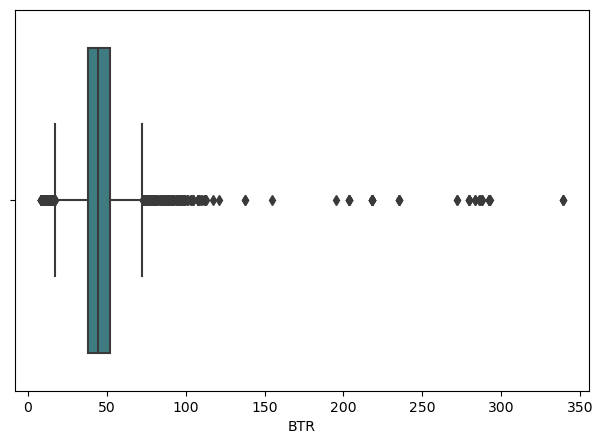

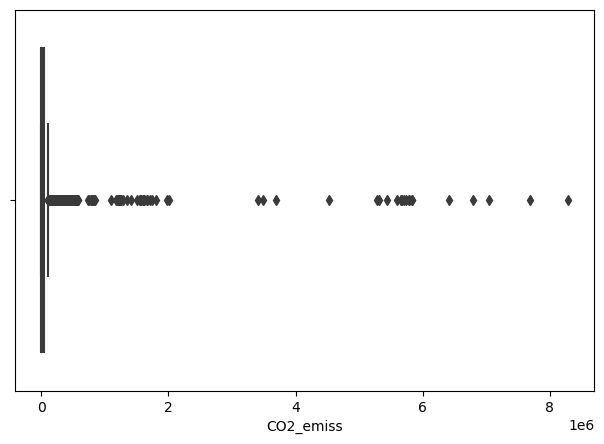

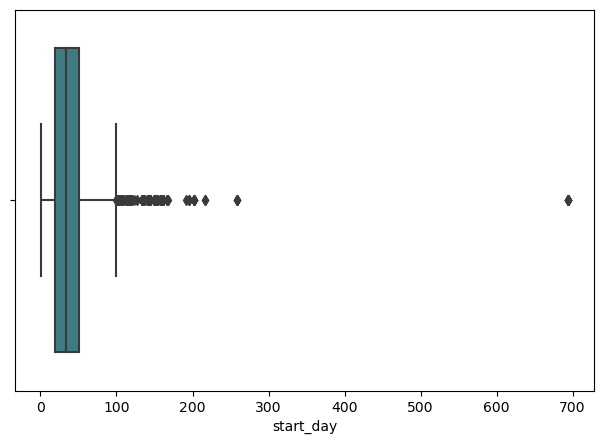

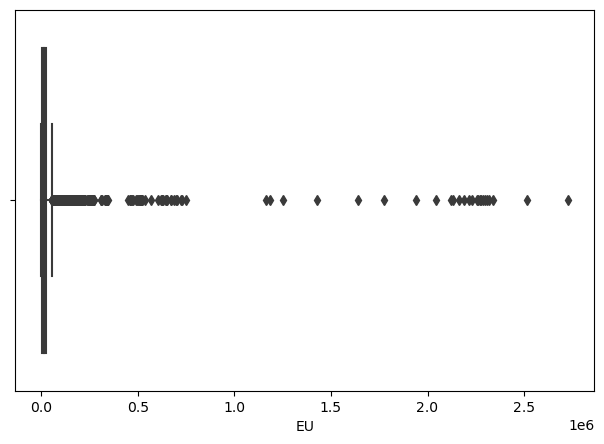

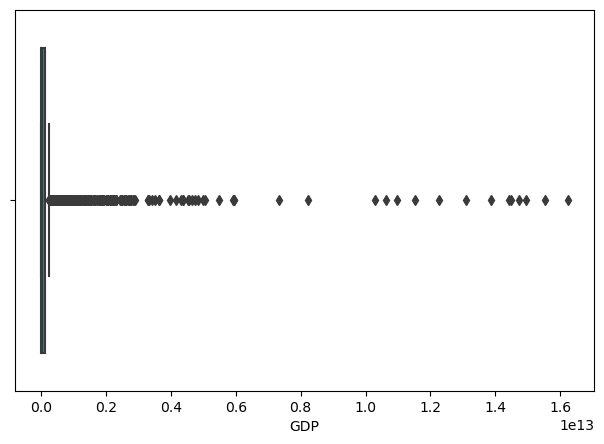

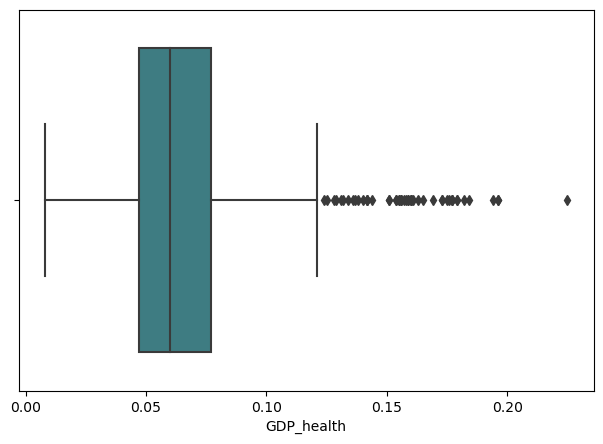

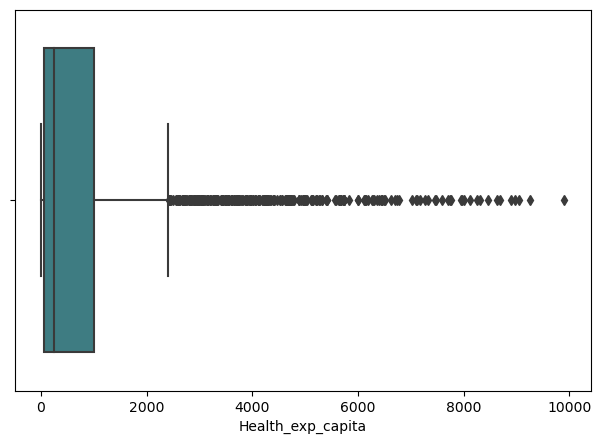

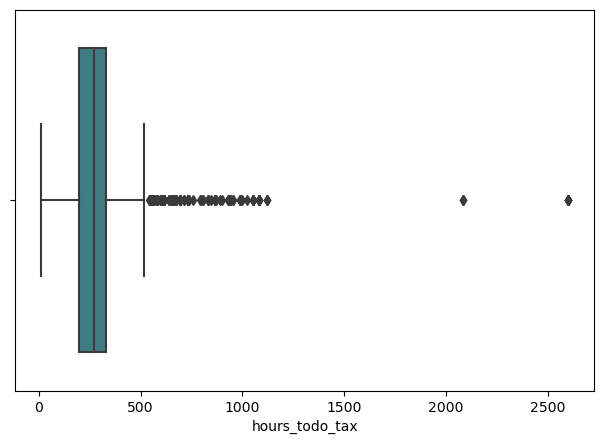

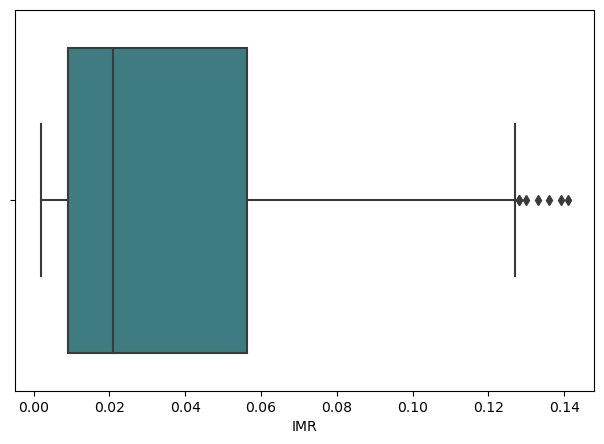

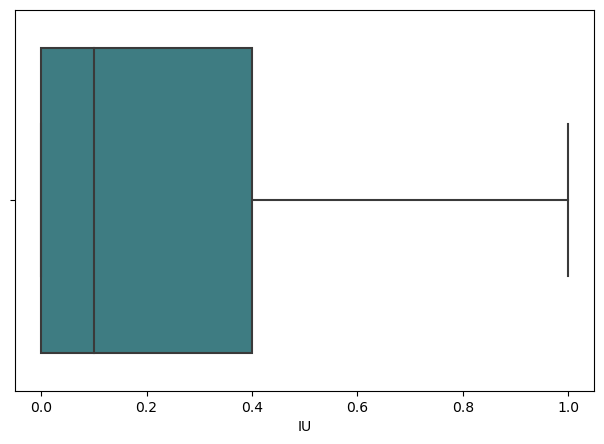

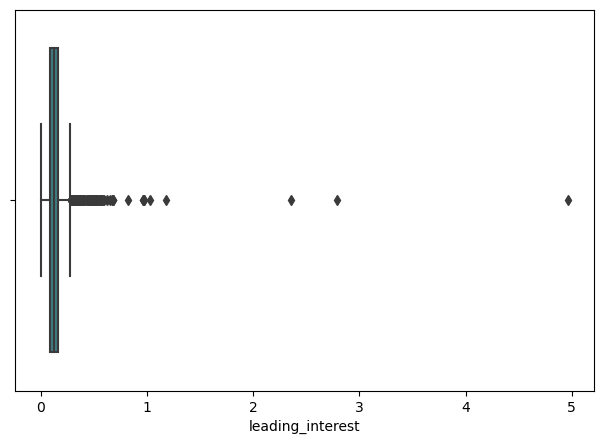

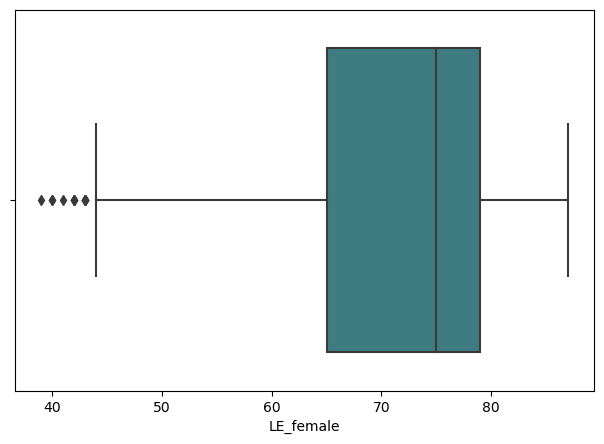

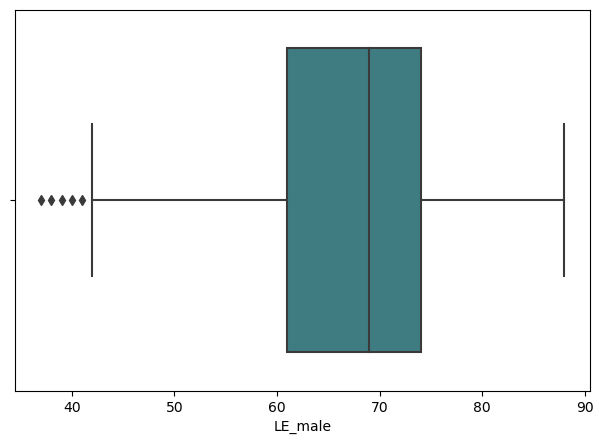

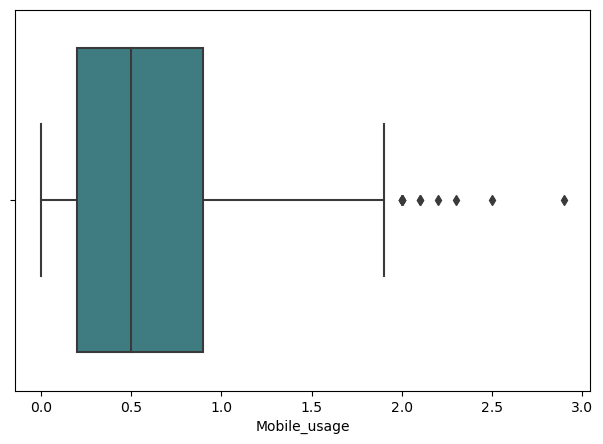

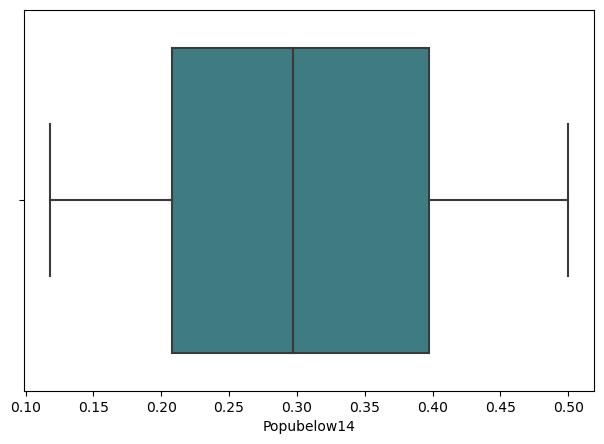

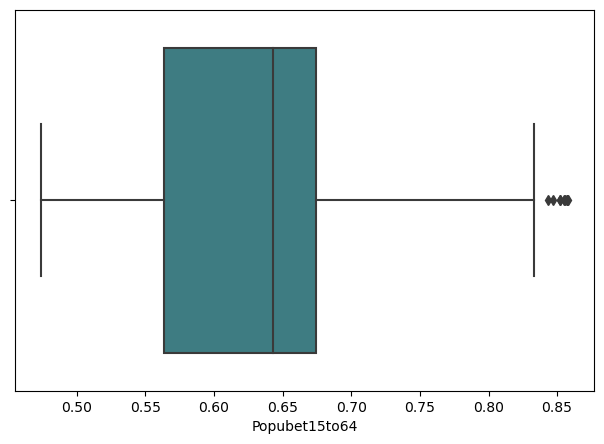

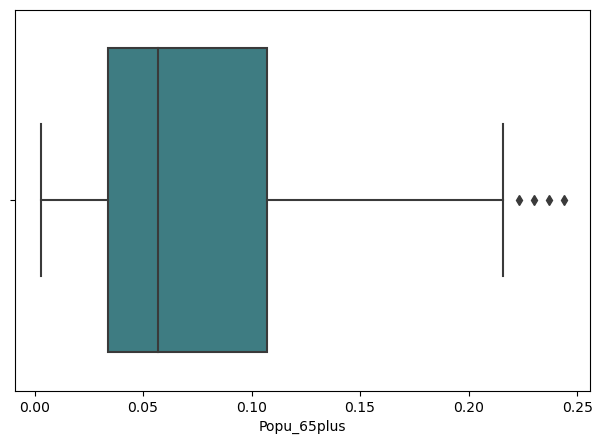

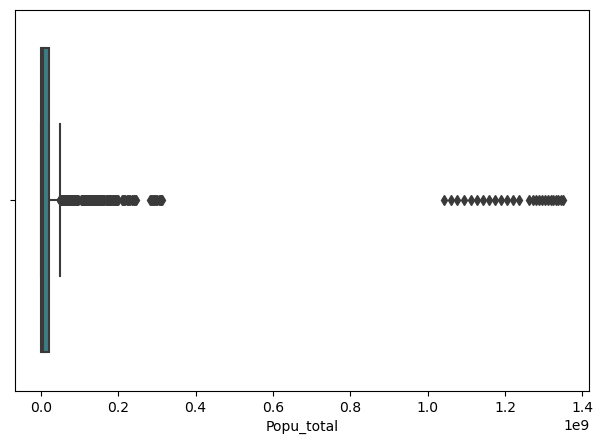

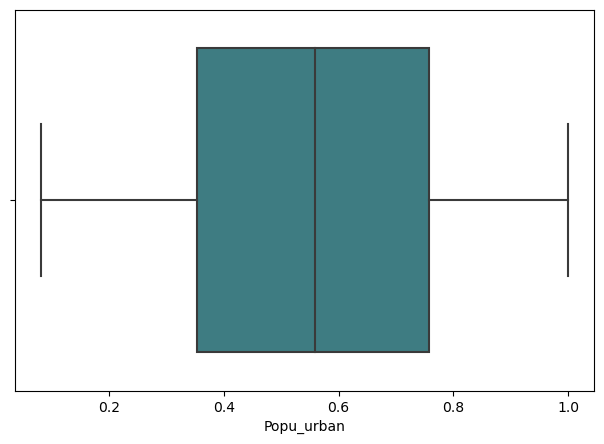

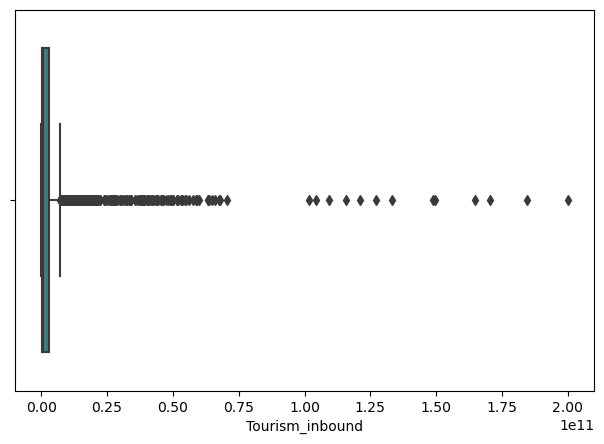

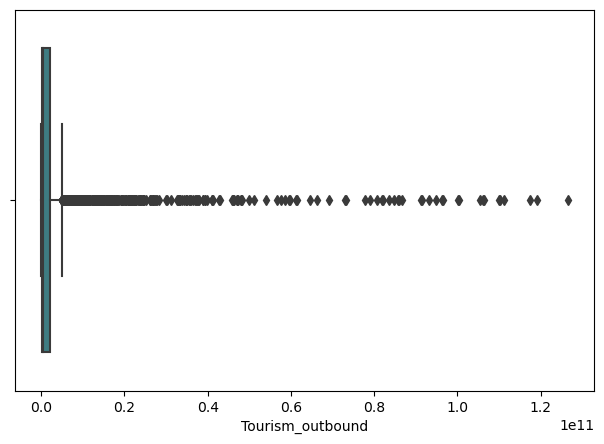

In [27]:
### Square transformation
ot_sqrt=df1.copy()
for feature1 in ot_sqrt.columns:
    plt.figure()
    sns.boxplot(x=ot_sqrt[feature1],data=ot_sqrt,palette='crest')
    plt.tight_layout(pad=2.0)

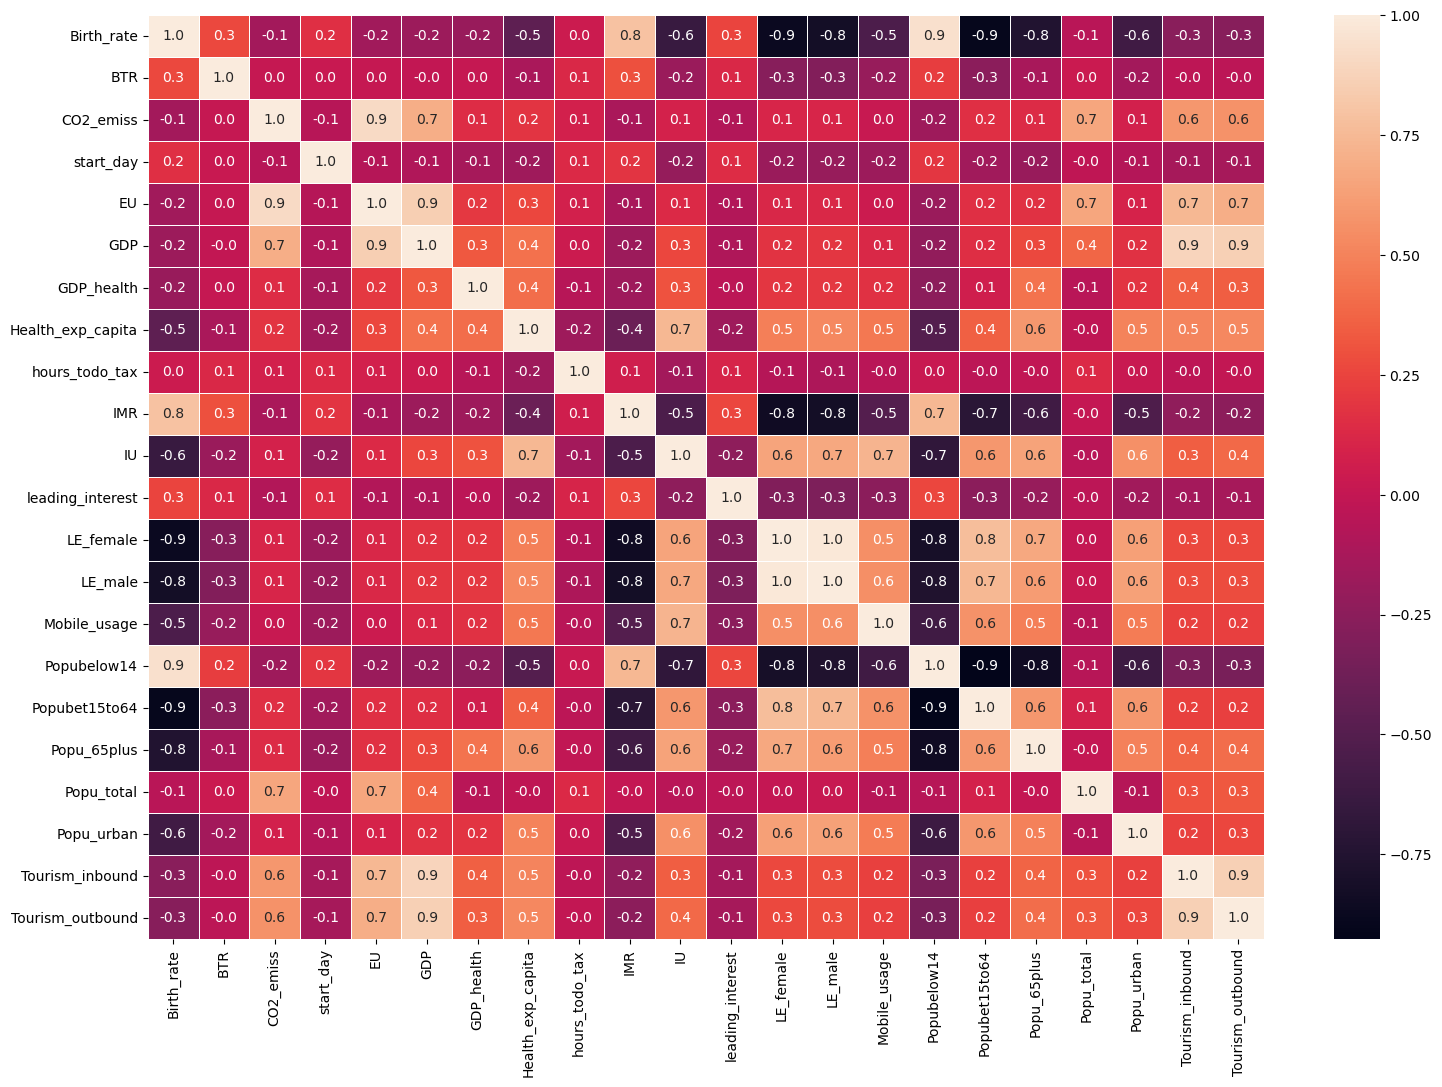

In [28]:
#### Data Visualization
f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(df1.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

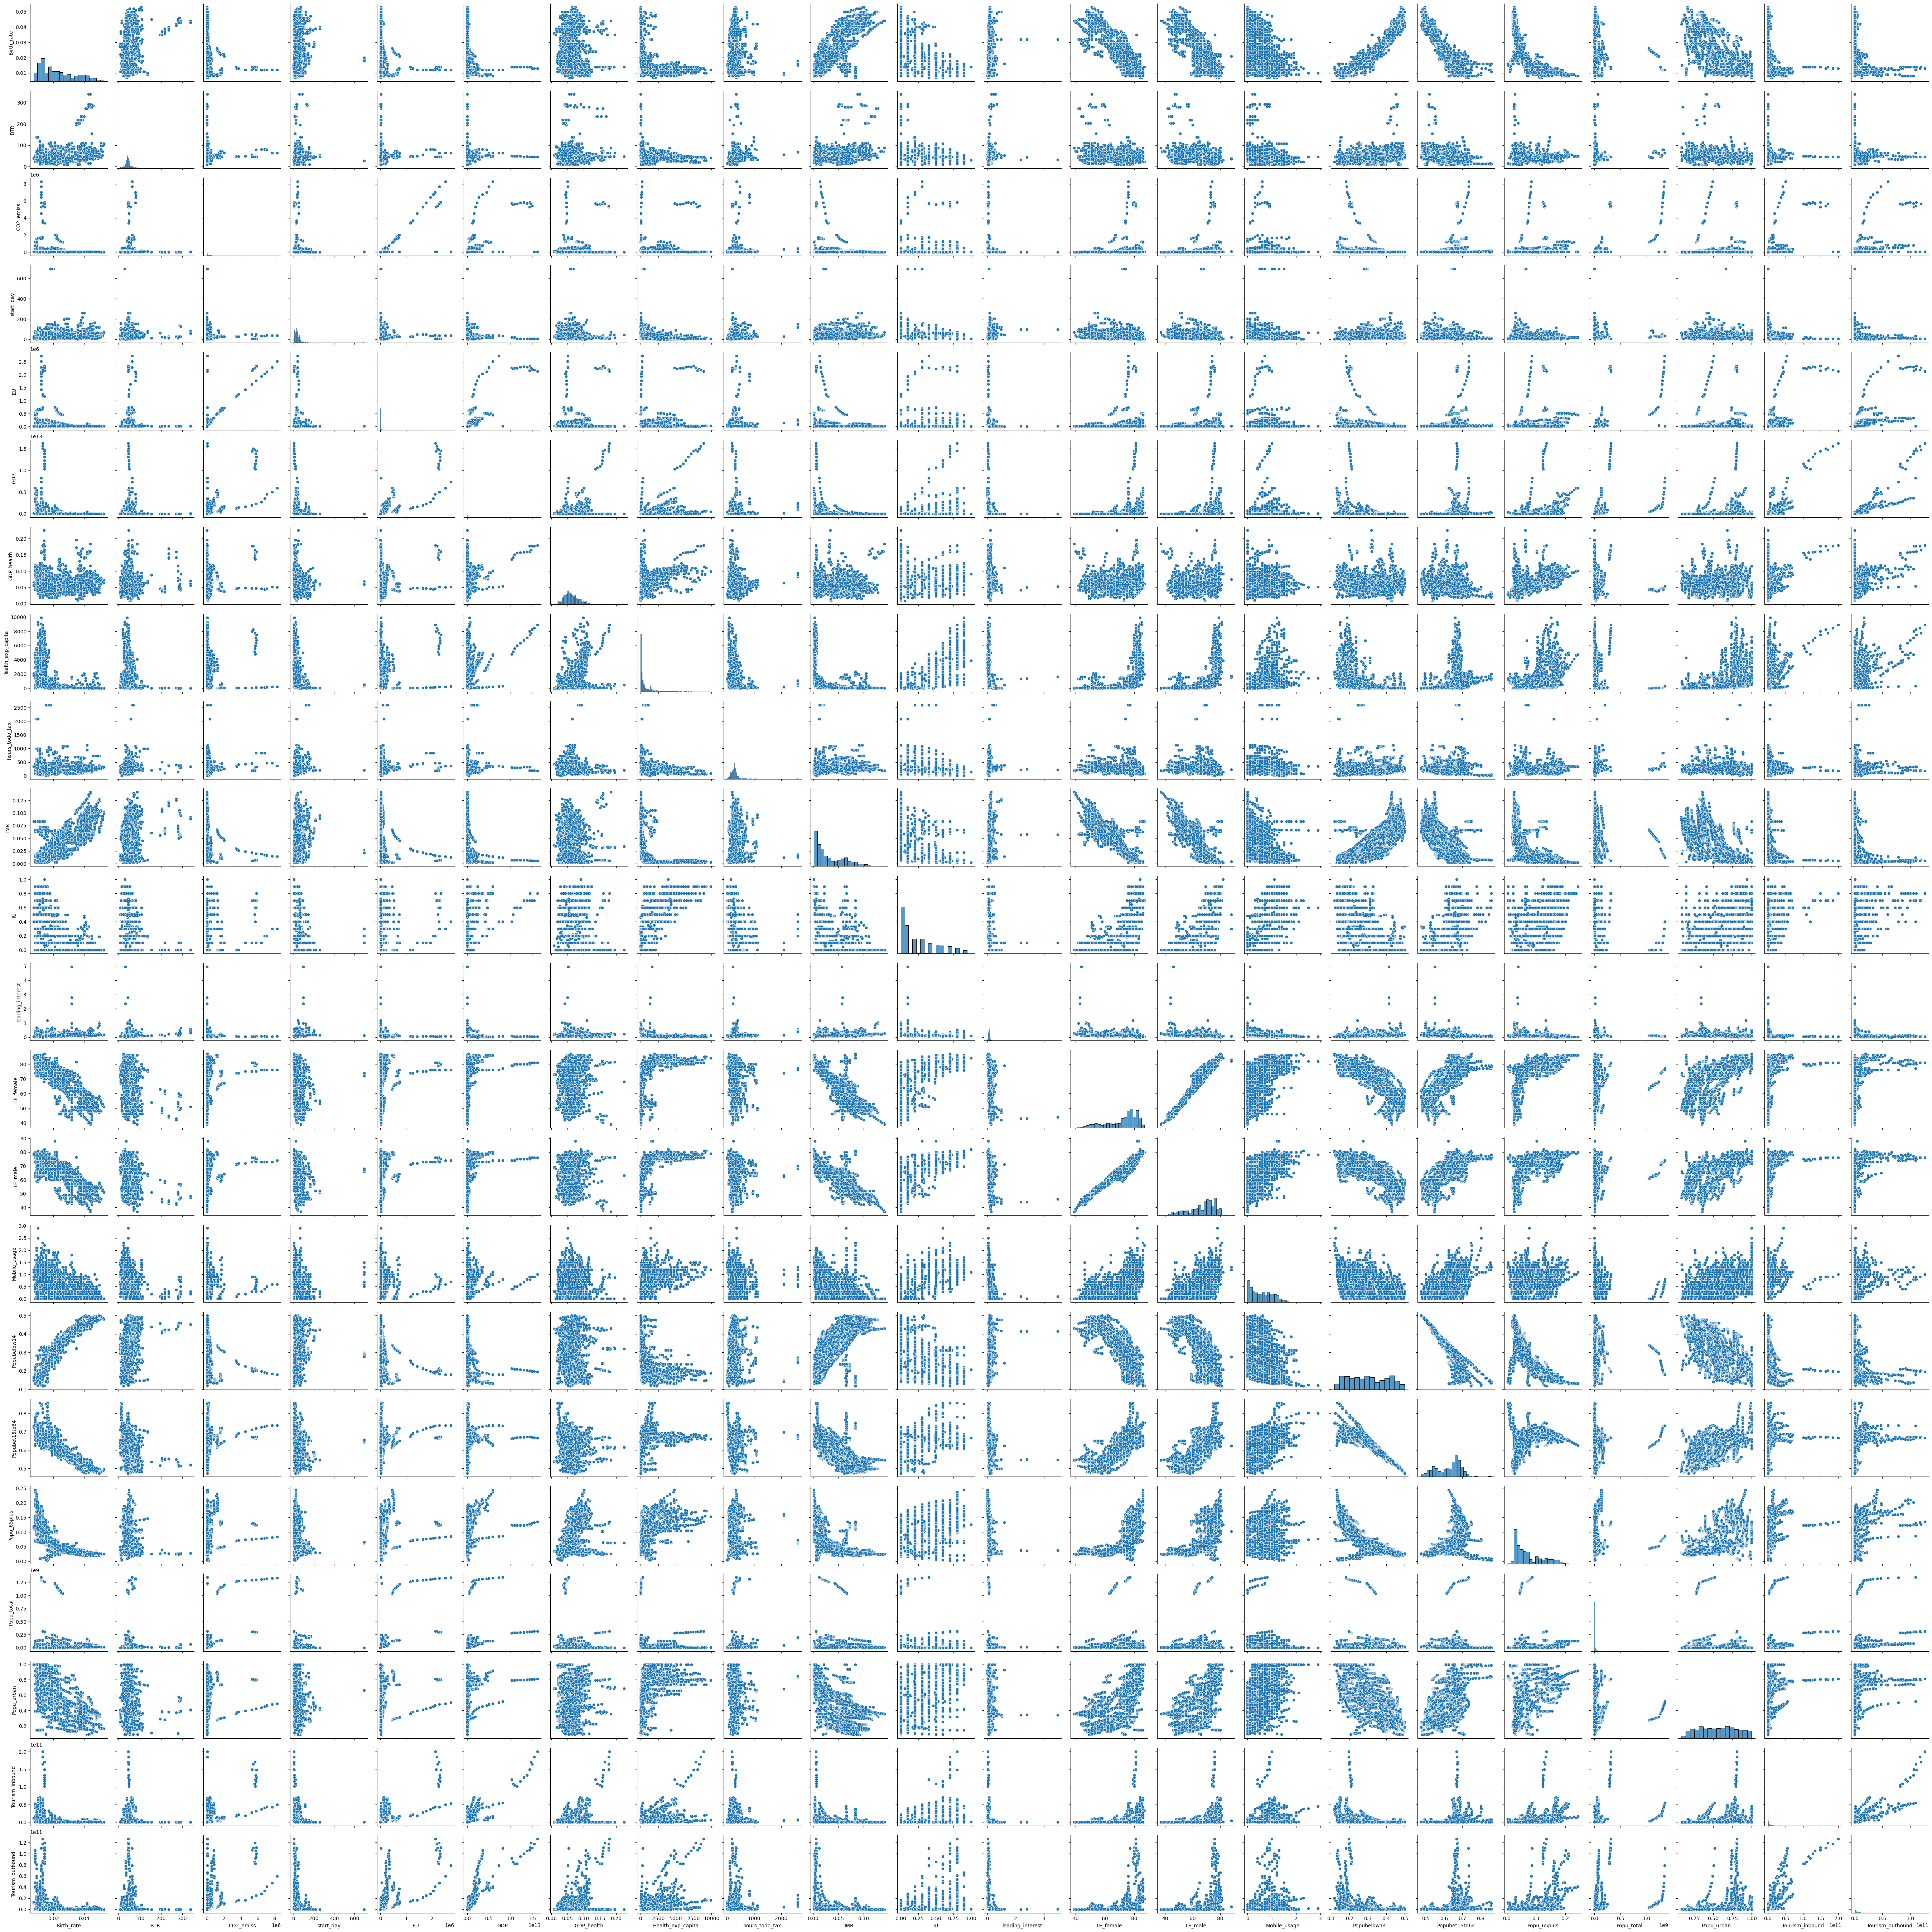

In [29]:
## Pairplot
sns.pairplot(df1)

### Model Building

In [30]:
#Standardizing the DataFrame
scaler  = StandardScaler()
scaler_df = scaler.fit_transform(df1)

#Normalize the DataFrame
df_norm = normalize(scaler_df)

df_norm = pd.DataFrame(df_norm,columns=df1.columns)
df_norm.head()

Birth_rate       BTR  CO2_emiss  start_day        EU       GDP  GDP_health  \
0   -0.096288 -0.011346  -0.024239  -0.070217 -0.061318 -0.077895   -0.494672   
1    0.278554 -0.027282  -0.022563   0.023732 -0.026471 -0.025224   -0.134468   
2    0.388380  0.217117  -0.045262  -0.016006 -0.054990 -0.048497   -0.175717   
3    0.112582 -0.053987  -0.058391   0.073913 -0.072780 -0.063135   -0.187491   
4    0.387050  0.136565  -0.039543   0.100236 -0.033797 -0.042119   -0.094201   

   Health_exp_capita  hours_todo_tax       IMR  ...  LE_female   LE_male  \
0          -0.243063        0.120398  0.004137  ...  -0.017217  0.013508   
1          -0.066879        0.020252  0.361647  ...  -0.262062 -0.277366   
2          -0.126126        0.003822  0.403780  ...  -0.289439 -0.313170   
3          -0.139615       -0.062716  0.192081  ...  -0.514528 -0.534005   
4          -0.110037       -0.015399  0.388454  ...  -0.338869 -0.351697   

   Mobile_usage  Popubelow14  Popubet15to64  Popu_65plus  Popu_total  \
0     -0.542174     0.169533      -0.035425    -0.315017   -0.001606   
1     -0.142446     0.192219      -0.211770    -0.115969   -0.016645   
2     -0.266419     0.314163      -0.339276    -0.199154   -0.043026   
3     -0.291074     0.221521      -0.156272    -0.262887   -0.068486   
4     -0.231615     0.298209      -0.327875    -0.176994   -0.030499   

   Popu_urban  Tourism_inbound  Tourism_outbound  
0    0.072190        -0.146037         -0.137787  
1   -0.110120        -0.038964         -0.036639  
2   -0.154161        -0.072170         -0.070198  
3   -0.030820        -0.092026         -0.089007  
4   -0.290488        -0.063511         -0.061331  

[5 rows x 22 columns]

### Hierarichal Clustering

In [ ]:
# create dendrogram
plt.figure(figsize=(20,20))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='ward'))

In [ ]:
hc = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="average")

In [ ]:
clusters = hc.fit_predict(df_norm)

In [ ]:
plt.scatter(df_norm.iloc[:,0],df_norm.iloc[:,1] , c=clusters)

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df_norm, x='BTR', y='GDP').set_title('Without cliustering')
sns.scatterplot(ax=axes[1], data=df_norm, x='BTR', y='GDP', hue=hc).set_title('With clustering');

In [ ]:
clusters

In [ ]:
silhouette_score = silhouette_score(df_norm,hc.labels_)
print("Silhouette Score: ", silhouette_score)

### K-Means Clustering

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(scaler_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
### From above method, we can say that optimum number of clusters are 5.
kmeans

In [ ]:
clusterr_4=KMeans(n_clusters=5, random_state=10)
pred_class=clusterr_4.fit_predict(scaler_df)
print(pred_class)

In [ ]:
clusterr_6=KMeans(n_clusters=6, random_state=10)
pred_class6=clusterr_6.fit_predict(scaler_df)
print(pred_class6)

In [ ]:
model = KMeans(n_clusters=4, init='k-means++')
labels = model.fit_predict(scaler_df)
labels
score = silhouette_score(scaler_df, labels)

In [ ]:
#plt.scatter(scaler_df[:, 0], scaler_df[:, 1], c=pred_class, s=50)


In [ ]:
#plt.scatter(scaler_df[:, 0], scaler_df[:, 1], c=pred_class6, s=50)

In [ ]:
clusterer = KMeans(n_clusters=3, n_init="k-means++", random_state=10)
cluster_labels = clusterer.fit_predict(scaler_df)
cluster_labels


### DBScan Algorithm

In [ ]:
array=df1.values

In [ ]:
array

In [ ]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [ ]:
X

In [ ]:
dbscan = DBSCAN(eps=0.8, min_samples=6)
dbscan.fit(X)